In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

---
#### DATASET 1: SALES dataframe contains the following features:

- **WEEK_END_DATE** - week date
- **STORE_NUM** - store number
- **UPC** - (Universal Product Code) product specific identifier
- **BASE_PRICE** - base price of item
- **DISPLAY** - product was a part of in-store promotional display
- **FEATURE** - product was in in-store circular
- **UNITS** - units sold (target)

---

In [2]:
# Read the sales data.
sales = pd.read_csv('data/sales.csv')

In [3]:
sales.head()

,WEEK_END_DATE,STORE_NUM,UPC,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS
0,13-Jan-16,367,1111009477,1.39,1.57,0,0,13
1,13-Jan-16,367,1111009497,1.39,1.39,0,0,20
2,13-Jan-16,367,1111085319,1.88,1.88,0,0,14
3,13-Jan-16,367,1111085345,1.88,1.88,0,0,29
4,13-Jan-16,367,1111085350,1.98,1.98,0,0,35


---

####  `SALES`  dataframe has the following categorical features:

    - STORE_NUM
    - UPC
    - FEATURE
    - DISPLAY
    
---

In [4]:
# Check for the null values in the categorical features.
sales[['STORE_NUM', 'UPC', 'FEATURE', 'DISPLAY']].isna().sum()

STORE_NUM    0
UPC          0
FEATURE      0
DISPLAY      0
dtype: int64

***No Null Values***

---
 -  `STORE_NUM` - No changes required as it is a key and will be used to merge tables later.
 -  `UPC      ` - No changes required as it is a key and will be used to merge tables later.
 -  `FEATURE  ` - No Changes Required. Values already coded as '0' or '1'.
 -  `DISPLAY  ` - No Changes Required. Values already coded as '0' or '1'.
 ---

---

### `DATASET 2: PRODUCTS` contains the details about the products

- **UPC** - (Universal Product Code) product specific identifier
- **DESCRIPTION**	- product description
- **MANUFACTURER** - product	manufacturer
- **CATEGORY** - category of product
- **SUB_CATEGORY** - sub-category of product
- **PRODUCT_SIZE** - package size or quantity of product

---

In [5]:
# Read the product data.
products = pd.read_csv('data/product_data.csv')

In [6]:
products.head()

,UPC,DESCRIPTION,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PL MINI TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PL PRETZEL STICKS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PL TWIST PRETZELS,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111038078,PL BL MINT ANTSPTC RINSE,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
4,1111038080,PL ANTSPTC SPG MNT MTHWS,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML


---

### `PRODUCTS' dataframe has the following categorical features:

    - UPC
    - DESCRIPTION
    - MANUFACTURER
    - CATEGORY
    - SUB_CATEGORY
    - PRODUCT_SIZE
    
---

In [7]:
# Shape of the data.
products.shape

(30, 6)

In [8]:
# Check for the null values in the categorical features.
products[['UPC', 'DESCRIPTION', 'MANUFACTURER', 'CATEGORY', 'SUB_CATEGORY', 'PRODUCT_SIZE']].isna().sum()

UPC             0
DESCRIPTION     0
MANUFACTURER    0
CATEGORY        0
SUB_CATEGORY    0
PRODUCT_SIZE    0
dtype: int64

***No Null Values***

In [9]:
# Number of unique description.
products.DESCRIPTION.nunique()

29

In [10]:
# Number of unique manufacturer.
products.MANUFACTURER.nunique()

9

In [11]:
# Number of unique categories.
products.CATEGORY.nunique()

4

In [12]:
# Number of unique sub categories.
products.SUB_CATEGORY.nunique()

7

In [13]:
# Number of unique product sizes.
products.PRODUCT_SIZE.nunique()

16

---
 - `DESCRIPTION` - In the description, we have category, subcategory and size of the product and these are already present in the other features as well. So, we will drop this feature as it will not add much value to the model.
 - `MANUFACTURER`, `CATEGORY`, `SUB_CATEGORY`- As, there is no order in the given categories, so we will One Hot Encode this features.
 - `PRODUCT_SIZE` - The product size units are different for different categories of products. So, here for each category we will do the binning based on different sizes.
---

In [14]:
# Drop the DESCRIPTION FEATURE.
products = products.drop(columns= ['DESCRIPTION'])

In [15]:
products

,UPC,MANUFACTURER,CATEGORY,SUB_CATEGORY,PRODUCT_SIZE
0,1111009477,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
1,1111009497,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
2,1111009507,PRIVATE LABEL,BAG SNACKS,PRETZELS,15 OZ
3,1111038078,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
4,1111038080,PRIVATE LABEL,ORAL HYGIENE PRODUCTS,MOUTHWASHES (ANTISEPTIC),500 ML
5,1111085319,PRIVATE LABEL,COLD CEREAL,ALL FAMILY CEREAL,12.25 OZ
6,1111085345,PRIVATE LABEL,COLD CEREAL,ADULT CEREAL,20 OZ
7,1111085350,PRIVATE LABEL,COLD CEREAL,ALL FAMILY CEREAL,18 OZ
8,1111087395,PRIVATE LABEL,FROZEN PIZZA,PIZZA/PREMIUM,32.7 OZ
9,1111087396,PRIVATE LABEL,FROZEN PIZZA,PIZZA/PREMIUM,30.5 OZ


In [16]:
# Remove the units from the product size. Keep only the values.
products['PRODUCT_SIZE'] = products.PRODUCT_SIZE.apply(lambda x: x.split()[0])

In [17]:
# Change data type of product size from string to float.
products.PRODUCT_SIZE = products.PRODUCT_SIZE.astype(float)

In [18]:
# Examine unique product size values for each category.
products.groupby(['CATEGORY'])['PRODUCT_SIZE'].unique()

CATEGORY
BAG SNACKS                                  [15.0, 16.0, 10.0]
COLD CEREAL              [12.25, 20.0, 18.0, 12.0, 15.0, 12.2]
FROZEN PIZZA              [32.7, 30.5, 29.6, 29.8, 28.3, 22.7]
ORAL HYGIENE PRODUCTS                             [500.0, 1.0]
Name: PRODUCT_SIZE, dtype: object

In [19]:
# Define 3 bins for category type = "COLD CEREAL".
products.loc[products.CATEGORY == 'COLD CEREAL', 'PRODUCT_SIZE'] = pd.cut(products.PRODUCT_SIZE,
                                                                                 bins=[10,13,16,21],
                                                                                 labels=[1,2,3])

In [20]:
# Define 2 bins for category type = "ORAL HYGIENE PRODUCTS".
products.loc[products.CATEGORY == 'ORAL HYGIENE PRODUCTS', 'PRODUCT_SIZE'] = pd.cut(products.PRODUCT_SIZE,
                                                                                            bins=[0,501,1001],
                                                                                            labels=[1,2])

In [21]:
# Define 3 bins for category type = "FROZEN PIZZA".
products.loc[products.CATEGORY == 'FROZEN PIZZA', 'PRODUCT_SIZE'] = pd.cut(products.PRODUCT_SIZE,
                                                                                   bins=[20,25,30,35],
                                                                                   labels=[1,2,3])

In [22]:
# Define 2 bins for category type = "BAG SNACKS".
products.loc[products.CATEGORY == 'BAG SNACKS', 'PRODUCT_SIZE'] = pd.cut(products.PRODUCT_SIZE,
                                                                                 bins=[9,14,20],
                                                                                 labels=[1,2])

In [23]:
# Value counts of PRODUCT SIZE.
products.PRODUCT_SIZE.value_counts()

1    12
2    11
3     7
Name: PRODUCT_SIZE, dtype: int64

In [24]:
# One Hot Encode features.
OHE_p = ce.OneHotEncoder(cols= ['MANUFACTURER', 'CATEGORY', 'SUB_CATEGORY'])

In [25]:
# Transform the data.
products = OHE_p.fit_transform(products)

In [26]:
# Look at updated data.
products.head()

,UPC,MANUFACTURER_1,MANUFACTURER_2,MANUFACTURER_3,MANUFACTURER_4,MANUFACTURER_5,MANUFACTURER_6,MANUFACTURER_7,MANUFACTURER_8,MANUFACTURER_9,...,CATEGORY_3,CATEGORY_4,SUB_CATEGORY_1,SUB_CATEGORY_2,SUB_CATEGORY_3,SUB_CATEGORY_4,SUB_CATEGORY_5,SUB_CATEGORY_6,SUB_CATEGORY_7,PRODUCT_SIZE
0,1111009477,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
1,1111009497,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
2,1111009507,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
3,1111038078,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1111038080,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [27]:
# Shape of the updated data.
products.shape

(30, 22)

In [28]:
# Columns of the updated data.
products.columns

Index(['UPC', 'MANUFACTURER_1', 'MANUFACTURER_2', 'MANUFACTURER_3',
       'MANUFACTURER_4', 'MANUFACTURER_5', 'MANUFACTURER_6', 'MANUFACTURER_7',
       'MANUFACTURER_8', 'MANUFACTURER_9', 'CATEGORY_1', 'CATEGORY_2',
       'CATEGORY_3', 'CATEGORY_4', 'SUB_CATEGORY_1', 'SUB_CATEGORY_2',
       'SUB_CATEGORY_3', 'SUB_CATEGORY_4', 'SUB_CATEGORY_5', 'SUB_CATEGORY_6',
       'SUB_CATEGORY_7', 'PRODUCT_SIZE'],
      dtype='object')

---
#### `DATASET 3: STORES`

- **STORE_ID** - store number
- **STORE_NAME** - Name of store
- **ADDRESS_CITY_NAME** - city
- **ADDRESS_STATE_PROV_CODE** - state
- **MSA_CODE** - (Metropolitan Statistical Area) Based on geographic region and population density
- **SEG_VALUE_NAME** - Store Segment Name
- **PARKING_SPACE_QTY** - number of parking spaces in the store parking lot
- **SALES_AREA_SIZE_NUM** - square footage of store
- **AVG_WEEKLY_BASKETS** - average weekly baskets sold in the store

---

In [29]:
# Read the store data.
stores = pd.read_csv('data/store_data.csv')

In [30]:
stores.head()

,STORE_ID,STORE_NAME,ADDRESS_CITY_NAME,ADDRESS_STATE_PROV_CODE,MSA_CODE,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,15TH & MADISON,COVINGTON,KY,17140,VALUE,196.0,24721,12707
1,389,SILVERLAKE,ERLANGER,KY,17140,MAINSTREAM,408.0,46073,24767
2,613,EAST ALLEN,ALLEN,TX,19100,MAINSTREAM,464.0,64926,29386
3,623,HOUSTON,HOUSTON,TX,26420,MAINSTREAM,NaN,46930,36741
4,2277,ANDERSON TOWNE CTR,CINCINNATI,OH,17140,UPSCALE,NaN,81958,54053


---

### 'STORES' dataframe has the following categorical features:

    - STORE_ID
    - STORE_NAME
    - ADDRESS_CITY_NAME
    - ADDRESS_STATE_PROV_CODE
    - MSA_CODE
    - SEG_VALUE_NAME
    
---    

In [31]:
# Shape of the store data.
stores.shape

(76, 9)

In [32]:
# Check for the null values.
stores[['STORE_ID', 'STORE_NAME', 'ADDRESS_CITY_NAME', 'ADDRESS_STATE_PROV_CODE', 'MSA_CODE', 'SEG_VALUE_NAME']].isna().sum()

STORE_ID                   0
STORE_NAME                 0
ADDRESS_CITY_NAME          0
ADDRESS_STATE_PROV_CODE    0
MSA_CODE                   0
SEG_VALUE_NAME             0
dtype: int64

In [33]:
# Number of unique store names.
stores.STORE_NAME.nunique()

72

In [34]:
# Number of unique city names.
stores.ADDRESS_CITY_NAME.nunique()

51

In [35]:
# Number of unique state provision code.
stores.ADDRESS_STATE_PROV_CODE.nunique()

4

In [36]:
# Number of unique MSA codes.
stores.MSA_CODE.nunique()

9

In [37]:
# Number of unique segment value names.
stores.SEG_VALUE_NAME.nunique()

3

---

   - `STORE_ID` - No changes required as it is a key and will be used to merge files later.
   - `STORE_NAME` - Since, Out of 76 different stores we have 72 unique store names. Store name contains some location information of the store which we have in the form of address city name and state.
   - `ADDRESS_CITY_NAME` - Since, Out of 76 different stores we have 51 unique address city names, So we will drop this feature due to high cardinality
   - `ADDRESS_STATE_PROV_CODE`, `MSA_CODE` - As, there is no order in the given categories, So, we will One Hot Encode this variable.
   - `SEG_VALUE_NAME` - Stores segments are divided into 3 categories: upscale, mainstream and value. Upscale stores are just what they sound like; they are normally located in high income neighborhoods and offer more high-end product. Mainstream is middle of the road, mostly located in middle class areas, offering a mix of upscale and value product. Value stores cater more to low income customers, so there will be more focus on low prices than anything else.
   
   So we will map `VALUE AS 1`, `MAINSTREAM AS 2` and `UPSCALE AS 3`.

In [38]:
# Drop unnecessary store name and address.
stores = stores.drop(columns=['STORE_NAME', 'ADDRESS_CITY_NAME'])

In [39]:
# OneHotEncode the rest of the categorical features.
OHE = ce.OneHotEncoder(cols=['ADDRESS_STATE_PROV_CODE', 'MSA_CODE'])

stores.SEG_VALUE_NAME = stores.SEG_VALUE_NAME.map({'VALUE': 1, 'MAINSTREAM' : 2, 'UPSCALE': 3})

In [40]:
# Transform the data.
stores = OHE.fit_transform(stores)

In [41]:
# Examine updated data.
stores.head()

,STORE_ID,ADDRESS_STATE_PROV_CODE_1,ADDRESS_STATE_PROV_CODE_2,ADDRESS_STATE_PROV_CODE_3,ADDRESS_STATE_PROV_CODE_4,MSA_CODE_1,MSA_CODE_2,MSA_CODE_3,MSA_CODE_4,MSA_CODE_5,MSA_CODE_6,MSA_CODE_7,MSA_CODE_8,MSA_CODE_9,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,1,0,0,0,1,0,0,0,0,0,0,0,0,1,196.0,24721,12707
1,389,1,0,0,0,1,0,0,0,0,0,0,0,0,2,408.0,46073,24767
2,613,0,1,0,0,0,1,0,0,0,0,0,0,0,2,464.0,64926,29386
3,623,0,1,0,0,0,0,1,0,0,0,0,0,0,2,NaN,46930,36741
4,2277,0,0,1,0,1,0,0,0,0,0,0,0,0,3,NaN,81958,54053


In [42]:
# Shape of the updated data.
stores.shape

(76, 18)

In [43]:
# Columns of the updated data.
stores.columns

Index(['STORE_ID', 'ADDRESS_STATE_PROV_CODE_1', 'ADDRESS_STATE_PROV_CODE_2',
       'ADDRESS_STATE_PROV_CODE_3', 'ADDRESS_STATE_PROV_CODE_4', 'MSA_CODE_1',
       'MSA_CODE_2', 'MSA_CODE_3', 'MSA_CODE_4', 'MSA_CODE_5', 'MSA_CODE_6',
       'MSA_CODE_7', 'MSA_CODE_8', 'MSA_CODE_9', 'SEG_VALUE_NAME',
       'PARKING_SPACE_QTY', 'SALES_AREA_SIZE_NUM', 'AVG_WEEKLY_BASKETS'],
      dtype='object')

In [44]:
stores.loc[0]

STORE_ID                       367.0
ADDRESS_STATE_PROV_CODE_1        1.0
ADDRESS_STATE_PROV_CODE_2        0.0
ADDRESS_STATE_PROV_CODE_3        0.0
ADDRESS_STATE_PROV_CODE_4        0.0
MSA_CODE_1                       1.0
MSA_CODE_2                       0.0
MSA_CODE_3                       0.0
MSA_CODE_4                       0.0
MSA_CODE_5                       0.0
MSA_CODE_6                       0.0
MSA_CODE_7                       0.0
MSA_CODE_8                       0.0
MSA_CODE_9                       0.0
SEG_VALUE_NAME                   1.0
PARKING_SPACE_QTY              196.0
SALES_AREA_SIZE_NUM          24721.0
AVG_WEEKLY_BASKETS           12707.0
Name: 0, dtype: float64

---

#### PREPROCESSING: NUMERICAL FEATURES

- Check and impute the missing values in the numerical features.
- Check for the outliers and treat them.

---

---

### DATASET 1: SALES dataframe.

---

In [45]:
sales.head()

,WEEK_END_DATE,STORE_NUM,UPC,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS
0,13-Jan-16,367,1111009477,1.39,1.57,0,0,13
1,13-Jan-16,367,1111009497,1.39,1.39,0,0,20
2,13-Jan-16,367,1111085319,1.88,1.88,0,0,14
3,13-Jan-16,367,1111085345,1.88,1.88,0,0,29
4,13-Jan-16,367,1111085350,1.98,1.98,0,0,35


---

#### `SALES` dataframe has the following numerical features:

    - BASE_PRICE
    - UNITS (Target)
    
---    

 - `BASE_PRICE` - Missing Value Imputation
---

In [46]:
# Check the null values for the numerical features.
sales[[ 'BASE_PRICE', 'UNITS']].isna().sum()

BASE_PRICE    12
UNITS          0
dtype: int64

***Imputing the missing values in the Base Price***

---

In [47]:
# Create a new dataframe which will have "average base price" for the combination of STORE_NUM and UPC. Will be used to impute missing values.
avg_price = sales.groupby(['STORE_NUM', 'UPC'])['BASE_PRICE'].mean().reset_index()

In [48]:
avg_price

,STORE_NUM,UPC,BASE_PRICE
0,367,1111009477,1.489859
1,367,1111009497,1.490634
2,367,1111085319,1.843451
3,367,1111085345,1.827183
4,367,1111085350,2.322113
...,...,...,...
1639,29159,7192100336,6.494965
1640,29159,7192100337,6.496312
1641,29159,7192100339,6.504085
1642,29159,7797502248,2.445634


In [49]:
# Look at null values in BASE PRICE.
sales.loc[sales.BASE_PRICE.isna() == True]

,WEEK_END_DATE,STORE_NUM,UPC,PRICE,BASE_PRICE,FEATURE,DISPLAY,UNITS
279,13-Jan-16,4245,1111087395,3.32,NaN,0,1,56
280,13-Jan-16,4245,1111087398,3.31,NaN,0,1,72
301,13-Jan-16,4259,1111087395,3.33,NaN,0,1,52
303,13-Jan-16,4259,1111087398,3.39,NaN,0,1,52
1918,20-Jan-16,4245,1111087395,3.30,NaN,0,1,52
1919,20-Jan-16,4245,1111087398,3.28,NaN,0,1,82
1940,20-Jan-16,4259,1111087395,3.33,NaN,0,1,28
3555,27-Jan-16,4245,1111087395,3.37,NaN,1,1,45
3556,27-Jan-16,4245,1111087398,3.34,NaN,1,1,34
3577,27-Jan-16,4259,1111087395,3.27,NaN,1,1,31


In [50]:
# Define function to fill missing 'BASE_PRICE' values.
def fill_base_price(x) :
    return avg_price.BASE_PRICE[(avg_price.STORE_NUM == x['STORE_NUM']) & (avg_price.UPC == x['UPC'])].values[0]

In [51]:
# Use function to fill missing 'BASE_PRICE' values.
sales.BASE_PRICE[sales.BASE_PRICE.isna() == True] = sales[sales.BASE_PRICE.isna() == True].apply(fill_base_price, axis=1)

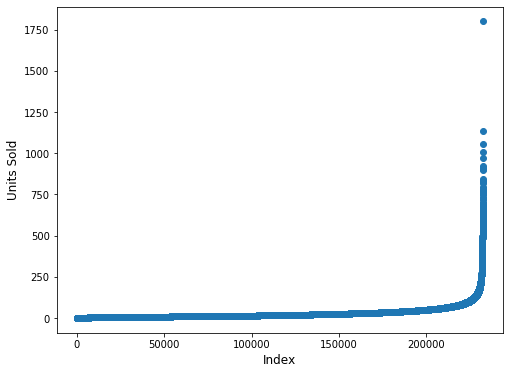

In [52]:
# Scatter plot for UNITS variable, sorted by target variable and scatter plot to see if there are outliers.  
%matplotlib inline

plt.figure(figsize=(8,6))
plt.scatter(x = range(sales.shape[0]), y = np.sort(sales['UNITS'].values))
plt.xlabel('Index', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.show()

In [53]:
# Number of data points where units are more than 750
sales['UNITS'][sales.UNITS > 750].shape[0]

21

---

***We can see that, there are a some points above where UNITS are more than 750 and there number is only 21. So, we can remove them as there number is only 21 and will not affect the data and these will act as a noise in the model.***

---

In [54]:
sales.shape

(232287, 8)

In [55]:
# Remove the values where UNITS are more than 750.
sales = sales[~(sales.UNITS > 750)]

In [56]:
# Verify removal.
sales[sales.UNITS > 750].shape[0]

0

In [57]:
# Remove the values where UNITS is 0.
sales = sales[~(sales.UNITS == 0)]

In [58]:
# Verify removal.
sales[sales.UNITS == 0].shape[0]

0

In [59]:
# Fill missing PRICE with BASE_PRICE.
sales.loc[sales['PRICE'].isnull(),'PRICE'] = sales['BASE_PRICE']

In [60]:
# Verify removal.

In [61]:
sales.isnull().sum().sum()

0

---

#### DATASET 2: `PRODUCTS` dataframe

---

In [62]:
# Examine the PRODUCTS dataframe.
products.head()

,UPC,MANUFACTURER_1,MANUFACTURER_2,MANUFACTURER_3,MANUFACTURER_4,MANUFACTURER_5,MANUFACTURER_6,MANUFACTURER_7,MANUFACTURER_8,MANUFACTURER_9,...,CATEGORY_3,CATEGORY_4,SUB_CATEGORY_1,SUB_CATEGORY_2,SUB_CATEGORY_3,SUB_CATEGORY_4,SUB_CATEGORY_5,SUB_CATEGORY_6,SUB_CATEGORY_7,PRODUCT_SIZE
0,1111009477,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
1,1111009497,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
2,1111009507,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
3,1111038078,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1111038080,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


---

##### **PRODUCTS dataframe has no numerical features.**
    
---    

---

#### DATASET 3: STORES dataframe

---

In [63]:
# Examine the STORES dataframe.
stores.head()

,STORE_ID,ADDRESS_STATE_PROV_CODE_1,ADDRESS_STATE_PROV_CODE_2,ADDRESS_STATE_PROV_CODE_3,ADDRESS_STATE_PROV_CODE_4,MSA_CODE_1,MSA_CODE_2,MSA_CODE_3,MSA_CODE_4,MSA_CODE_5,MSA_CODE_6,MSA_CODE_7,MSA_CODE_8,MSA_CODE_9,SEG_VALUE_NAME,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM,AVG_WEEKLY_BASKETS
0,367,1,0,0,0,1,0,0,0,0,0,0,0,0,1,196.0,24721,12707
1,389,1,0,0,0,1,0,0,0,0,0,0,0,0,2,408.0,46073,24767
2,613,0,1,0,0,0,1,0,0,0,0,0,0,0,2,464.0,64926,29386
3,623,0,1,0,0,0,0,1,0,0,0,0,0,0,2,NaN,46930,36741
4,2277,0,0,1,0,1,0,0,0,0,0,0,0,0,3,NaN,81958,54053


---

#### STORES dataframe has the following numerical features:

    - PARKING_SPACE_QTY
    - SALES_AREA_SIZE_NUM
    - AVG_WEEKLY_BASKETS
    
---    

In [64]:
# Shape of the data.
stores.shape

(76, 18)

In [65]:
# Check for the null values.
stores[['PARKING_SPACE_QTY', 'SALES_AREA_SIZE_NUM', 'AVG_WEEKLY_BASKETS']].isna().sum()

PARKING_SPACE_QTY      51
SALES_AREA_SIZE_NUM     0
AVG_WEEKLY_BASKETS      0
dtype: int64

---
- `PARKING_SPACE_QTY` - Has 51 null values. Check its correlation with the `SALES_AREA_SIZE_NUM`

---

In [66]:
# Check correlation
stores[['PARKING_SPACE_QTY','SALES_AREA_SIZE_NUM']].corr()

,PARKING_SPACE_QTY,SALES_AREA_SIZE_NUM
PARKING_SPACE_QTY,1.000000,0.763274
SALES_AREA_SIZE_NUM,0.763274,1.000000


***Note:*** Since the correlation of the **PARKING_SPACE_QTY** with **SALES_AREA_SIZE_NUM** is high so we can drop this column as it will not add much value to the model.

---

In [67]:
# Drop the PARKING_SPACE_QTY column.
stores = stores.drop(columns=['PARKING_SPACE_QTY'])

In [68]:
sales.isnull().sum()

WEEK_END_DATE    0
STORE_NUM        0
UPC              0
PRICE            0
BASE_PRICE       0
FEATURE          0
DISPLAY          0
UNITS            0
dtype: int64

---
### `SAVE THE UPDATED FILES`

---

In [69]:
sales.to_csv('data/salesdf.csv',index=False)
products.to_csv('data/productsdf.csv',index=False)
stores.to_csv('data/storesdf.csv',index=False)